### Assignment
In this assignment, you keep working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:
* postgres_user = 'dsbc_student'
* postgres_pw = '7*.8G9QH21'
* postgres_host = '142.93.121.174'
* postgres_port = '5432'
* postgres_db = 'studentsperformance'

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:


In [19]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [20]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

In [21]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [22]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [24]:
df.isnull().sum()*100/df.isnull().count()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

## Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?


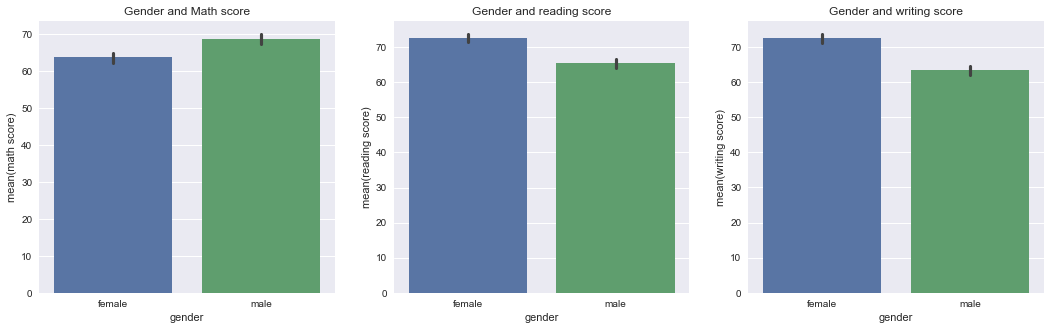

In [9]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df['gender'],df['math score'])
plt.title('Gender and Math score')

plt.subplot(1,3,2)
sns.barplot(df['gender'],df['reading score'])
plt.title('Gender and reading score')

plt.subplot(1,3,3)
sns.barplot(df['gender'],df['writing score'])
plt.title('Gender and writing score')

plt.show()

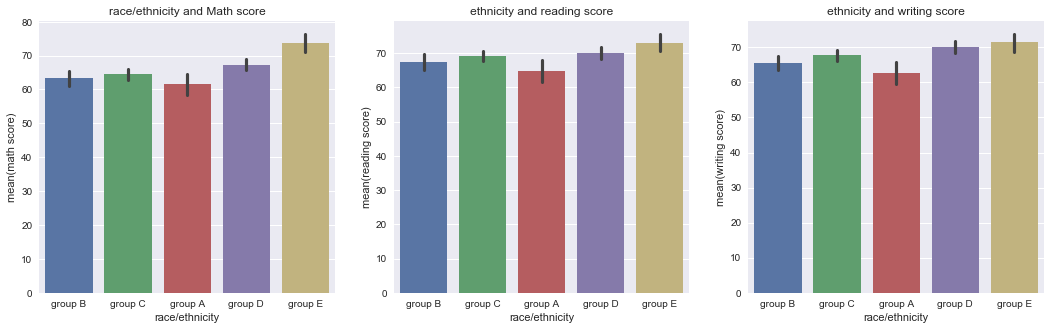

In [10]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df['race/ethnicity'],df['math score'])
plt.title('race/ethnicity and Math score')

plt.subplot(1,3,2)
sns.barplot(df['race/ethnicity'],df['reading score'])
plt.title('ethnicity and reading score')

plt.subplot(1,3,3)
sns.barplot(df['race/ethnicity'],df['writing score'])
plt.title('ethnicity and writing score')

plt.show()

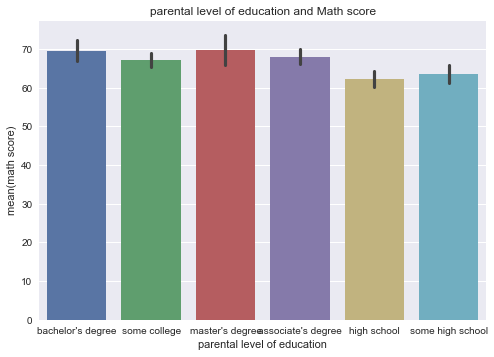

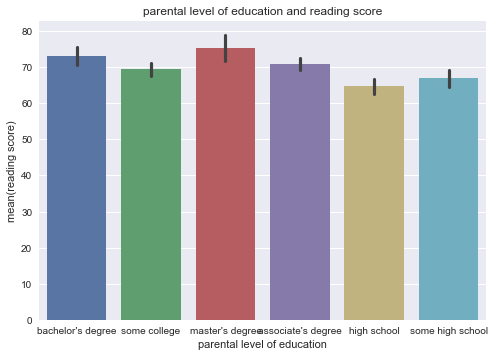

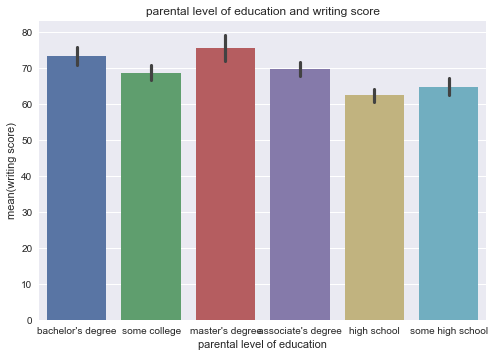

In [11]:
#plt.figure(figsize=(18,5))

#plt.subplot(1,3,1)
sns.barplot(df['parental level of education'],df['math score'])
plt.title('parental level of education and Math score')
plt.show()
#plt.subplot(1,3,2)
sns.barplot(df['parental level of education'],df['reading score'])
plt.title('parental level of education and reading score')
plt.show()
#plt.subplot(1,3,3)
sns.barplot(df['parental level of education'],df['writing score'])
plt.title('parental level of education and writing score')

plt.show()

### Visualize with means

In [14]:
df.groupby("gender").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [15]:
df.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [16]:
df.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


#### However, visualizing differences is not a formal way of stating that there are significant differences across categories! 

In [12]:
# Test whether group differences are significant.
gender = df['gender'].unique()
grouped_df = df.groupby("gender")
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(gender)):
        for j in range(i+1, len(gender)):
            print("t-test between groups {0} and {1}:".format(gender[i], gender[j]))
            print(stats.ttest_ind(
                df[df["gender"]==gender[i]][var], 
                df[df["gender"]==gender[j]][var]
            ))
            

# null hypo: there is no significant difference between male and female when it comes to math score

# p-value low meaning - reject the null

# ttest_ind(student_df[student_df.gender == "female"][["math score", "reading score", "writing score"]],
          #student_df[student_df.gender == "male"][["math score", "reading score", "writing score"]])

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


In [17]:
# Test whether group differences are significant.
gender = df['race/ethnicity'].unique()
grouped_df = df.groupby("race/ethnicity")
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(gender)):
        for j in range(i+1, len(gender)):
            print("t-test between groups {0} and {1}:".format(gender[i], gender[j]))
            print(stats.ttest_ind(
                df[df["race/ethnicity"]==gender[i]][var], 
                df[df["race/ethnicity"]==gender[j]][var]
            ))
            


------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


In [18]:
# Test whether group differences are significant.
gender = df['parental level of education'].unique()
grouped_df = df.groupby("parental level of education")
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(gender)):
        for j in range(i+1, len(gender)):
            print("t-test between groups {0} and {1}:".format(gender[i], gender[j]))
            print(stats.ttest_ind(
                df[df["parental level of education"]==gender[i]][var], 
                df[df["parental level of education"]==gender[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

## Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?


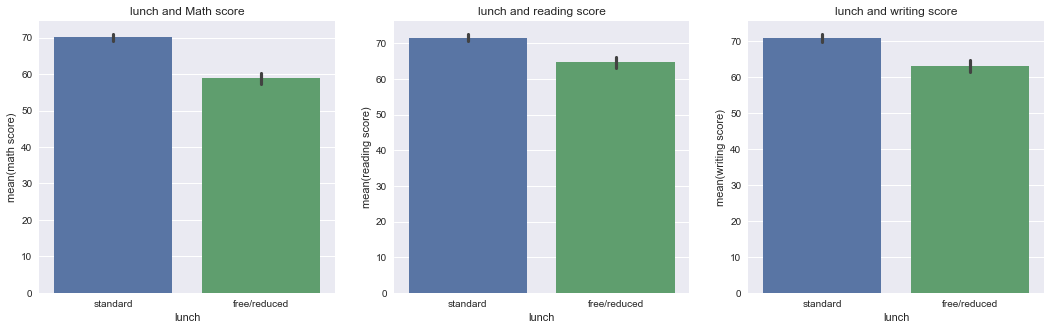

In [27]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df['lunch'],df['math score'])
plt.title('lunch and Math score')

plt.subplot(1,3,2)
sns.barplot(df['lunch'],df['reading score'])
plt.title('lunch and reading score')

plt.subplot(1,3,3)
sns.barplot(df['lunch'],df['writing score'])
plt.title('lunch and writing score')

plt.show()

### Does the test preparation course seem to have an effect on the exam performances?


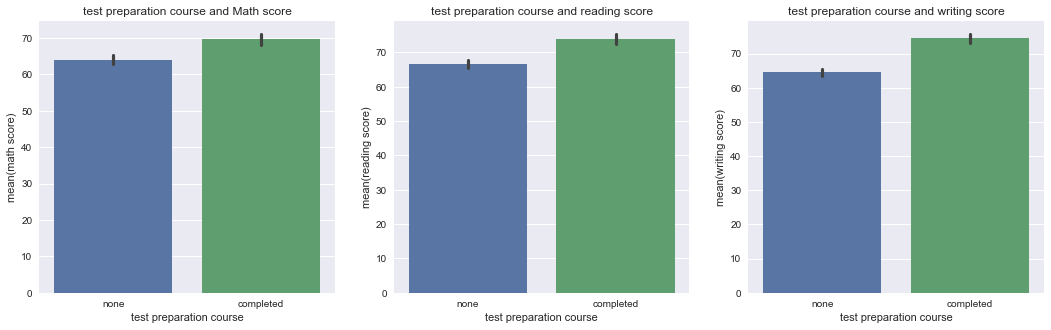

In [26]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df['test preparation course'],df['math score'])
plt.title('test preparation course and Math score')

plt.subplot(1,3,2)
sns.barplot(df['test preparation course'],df['reading score'])
plt.title('test preparation course and reading score')

plt.subplot(1,3,3)
sns.barplot(df['test preparation course'],df['writing score'])
plt.title('test preparation course and writing score')

plt.show()

In [27]:
# Test whether group differences are significant.
gender = df['test preparation course'].unique()
grouped_df = df.groupby("test preparation course")
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(gender)):
        for j in range(i+1, len(gender)):
            print("t-test between groups {0} and {1}:".format(gender[i], gender[j]))
            print(stats.ttest_ind(
                df[df["test preparation course"]==gender[i]][var], 
                df[df["test preparation course"]==gender[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


### Which 2 exam scores are most correlated with each other?

In [28]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Reading and writing are more correlated than any other combination.